In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brokenaxes

import seaborn as sns
import seaborn.objects as so

plt.rcParams.update({'font.size': 12})
%matplotlib inline

In [7]:
df = pd.read_csv("../baseline_results/inference_times.csv", names=["network", "layers", "library", "edges_per_second"])
df = df.sort_values("layers")
df.head()

,network,layers,library,edges_per_second
13,dataset/networks/radix,2,ours,2.773931e+09
12,dataset/networks/radix,2,pytorch,2.013817e+09
11,dataset/networks/radix,2,scipy,4.046195e+08
16,dataset/networks/radix,4,ours,4.063231e+09
15,dataset/networks/radix,4,pytorch,1.951986e+09


In [8]:
radix_results = df[df["network"] == "dataset/networks/radix"]
radix_results.head()

,network,layers,library,edges_per_second
13,dataset/networks/radix,2,ours,2.773931e+09
12,dataset/networks/radix,2,pytorch,2.013817e+09
11,dataset/networks/radix,2,scipy,4.046195e+08
16,dataset/networks/radix,4,ours,4.063231e+09
15,dataset/networks/radix,4,pytorch,1.951986e+09


In [39]:
radix_results_wide = radix_results.pivot("layers", "library", "edges_per_second")
radix_results_wide.head()

/tmp/ipykernel_15613/2252849434.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  radix_results_wide = radix_results.pivot("layers", "library", "edges_per_second")


library,ours,pytorch,scipy
layers,,,
2,2.773931e+09,2.013817e+09,4.046195e+08
4,4.063231e+09,1.951986e+09,5.399082e+08
8,5.989048e+09,1.888441e+09,8.681091e+08
16,6.592533e+09,1.863868e+09,1.538862e+09
120,6.221267e+09,NaN,4.427072e+09


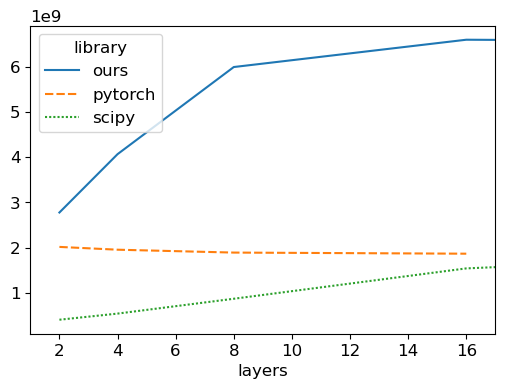

In [60]:
plt.figure(figsize=(6,4))
ax = sns.lineplot(data=radix_results_wide)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
ax.set_xlim(1,17)
plt.savefig("baseline_results_radix.pdf")

In [167]:
df = pd.read_csv("../results-old/inference_times.txt", names=["network", "layers", "order", "edges_per_second"])
df = df.sort_values("layers")
df = df.groupby(["network", "layers", "order"]).mean().reset_index()
df.head()

,network,layers,order,edges_per_second
0,dataset/networks/radix,2,GO,2.695549e+09
1,dataset/networks/radix,2,None,2.609516e+09
2,dataset/networks/radix,4,GO,4.225781e+09
3,dataset/networks/radix,4,None,4.019223e+09
4,dataset/networks/radix,8,GO,5.677945e+09


In [172]:
df["sparsity"] = 0.03
df.loc[df["network"] != "dataset/networks/radix", "sparsity"] = df.loc[df["network"] != "dataset/networks/radix", "network"].apply(lambda x : x.split("/")[3])
df["sparsity"] = df["sparsity"].astype(np.float32)
df.head()

,network,layers,order,edges_per_second,sparsity
0,dataset/networks/radix,2,GO,2.695549e+09,0.03
1,dataset/networks/radix,2,None,2.609516e+09,0.03
2,dataset/networks/radix,4,GO,4.225781e+09,0.03
3,dataset/networks/radix,4,None,4.019223e+09,0.03
4,dataset/networks/radix,8,GO,5.677945e+09,0.03


/tmp/ipykernel_15613/1743214907.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  radix_results_wide = radix_results.pivot("layers", "order", "edges_per_second")


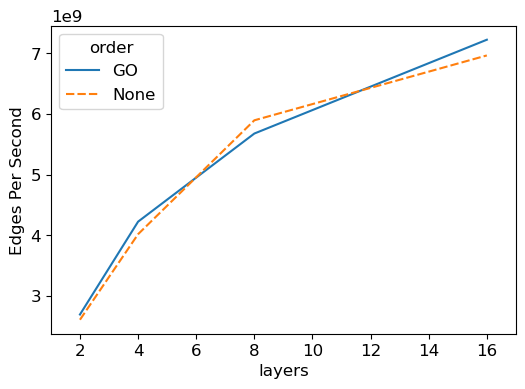

In [173]:
radix_results = df[df["network"] == "dataset/networks/radix"]
radix_results_wide = radix_results.pivot("layers", "order", "edges_per_second")
plt.figure(figsize=(6,4))
ax = sns.lineplot(data=radix_results_wide)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
ax.set_xlim(1,17)
ax.set_ylabel("Edges Per Second")
plt.savefig("ego_results_radix.pdf")

/tmp/ipykernel_15613/1595898232.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  radix_results_wide = radix_results.pivot("layers", "order", "edges_per_second")


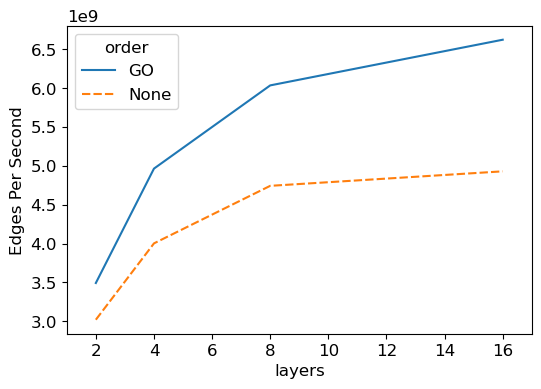

In [174]:
radix_results = df[df["network"] == "dataset/networks/random/0.05"]
radix_results_wide = radix_results.pivot("layers", "order", "edges_per_second")
plt.figure(figsize=(6,4))
ax = sns.lineplot(data=radix_results_wide)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
ax.set_xlim(1,17)
ax.set_ylabel("Edges Per Second")
plt.savefig("ego_results_random-0.05.pdf")

/tmp/ipykernel_15613/159754125.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_wide = results.pivot("sparsity", "order", "edges_per_second")


order               GO          None
sparsity                            
0.01      1.801347e+09  1.739781e+09
0.05      4.964476e+09  4.002645e+09
0.10      6.130540e+09  4.579899e+09
0.50               NaN  5.129830e+09


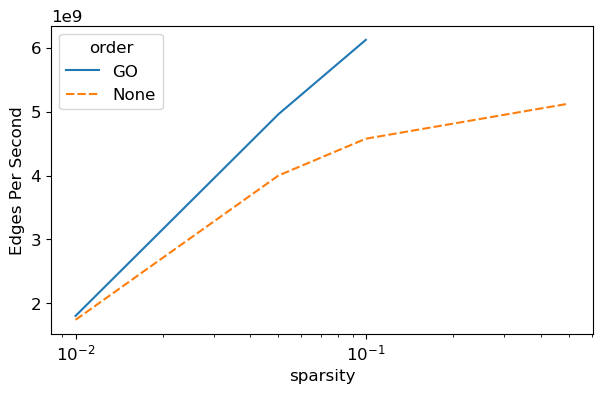

In [175]:
results = df[df["network"] != "dataset/networks/radix"]
results = results[results["layers"] == 4]
results_wide = results.pivot("sparsity", "order", "edges_per_second")
plt.figure(figsize=(7,4))
ax = sns.lineplot(data=results_wide)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
ax.set_ylabel("Edges Per Second")
ax.set_xscale("log")
plt.savefig("ego_results_by_sparsity.pdf")

In [196]:
df = pd.read_csv("../results-old/cache_results.csv", skiprows=lambda x : x%2==0, on_bad_lines="skip", names=["pid", 1, 2, 3, 4, 5, "misses", 6, "network", "layers", "order"])
df = df[["misses", "network", "layers", "order"]]
df["misses"] = df["misses"].astype(np.float32)

In [197]:
df["sparsity"] = 0.03
df.loc[df["network"] != "radix", "sparsity"] = df.loc[df["network"] != "radix", "network"].apply(lambda x : x.split("/")[1])
df.head()

,misses,network,layers,order,sparsity
0,5.92,random/0.01,2,GO,0.01
1,8.01,random/0.01,2,None,0.01
2,7.82,random/0.01,4,GO,0.01
3,10.40,random/0.01,4,None,0.01
4,10.42,random/0.01,8,GO,0.01


/tmp/ipykernel_15613/2702555661.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  radix_results_wide = radix_results.pivot("layers", "order", "misses")


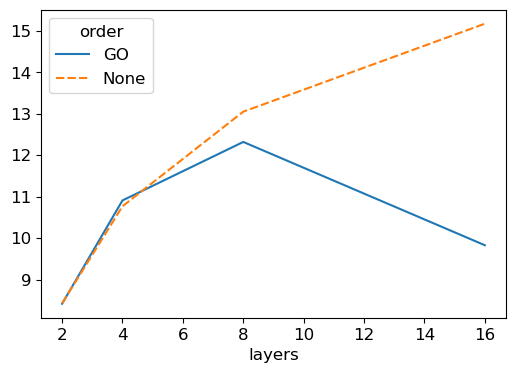

In [198]:
radix_results = df[df["network"] == "radix"]
radix_results_wide = radix_results.pivot("layers", "order", "misses")
plt.figure(figsize=(6,4))
sns.lineplot(data=radix_results_wide)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
ax.set_xlim(1,17)
ax.set_ylabel("Percent Cache Misses")
plt.savefig("ego_cache_results_radix.pdf")

/tmp/ipykernel_15613/3496243429.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_wide = results.pivot("layers", "order", "misses")


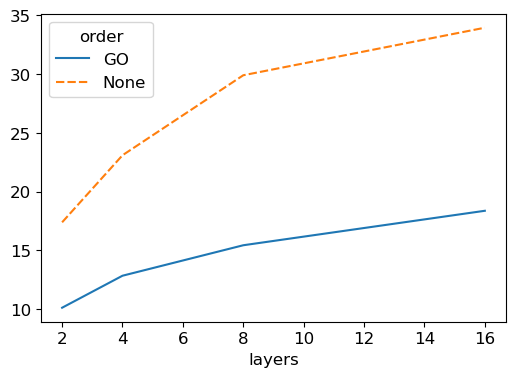

In [199]:
results = df[df["network"] == "random/0.05"]
results_wide = results.pivot("layers", "order", "misses")
plt.figure(figsize=(6,4))
sns.lineplot(data=results_wide)
ax.set_xlim(1,17)
ax.set_ylabel("Percent Cache Misses")
plt.savefig("ego_cache_results_random-0.05.pdf")

/tmp/ipykernel_15613/3015624417.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_wide = results.pivot("sparsity", "order", "misses")


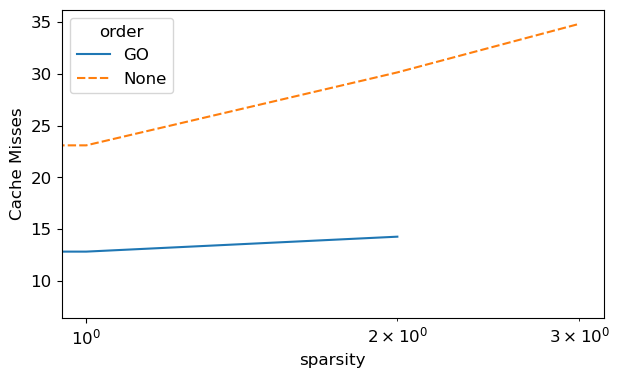

In [204]:
results = df[df["network"] != "radix"]
results = results[results["layers"] == 4]
results_wide = results.pivot("sparsity", "order", "misses")
plt.figure(figsize=(7,4))
ax = sns.lineplot(data=results_wide)
sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
ax.set_ylabel("Cache Misses")
ax.set_xscale("log")
plt.savefig("ego_cache_by_sparsity.pdf")

In [193]:
df = pd.read_csv("../results/inference_times.txt", names=["network", "layers", "order", "edges_per_second"])
df = df.sort_values("layers")
df = df.groupby(["network", "layers", "order"]).mean().reset_index()
df.head()

,network,layers,order,edges_per_second
0,dataset/networks/random-w16/0.05,2,EON,3.201307e+06
1,dataset/networks/random-w16/0.05,2,GO,3.154456e+06
2,dataset/networks/random-w16/0.05,2,None,3.129839e+06
3,dataset/networks/random-w16/0.05,4,EON,6.122024e+06
4,dataset/networks/random-w16/0.05,4,GO,6.105874e+06


/tmp/ipykernel_15613/308067494.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_wide = df.pivot("layers", "order", "edges_per_second")


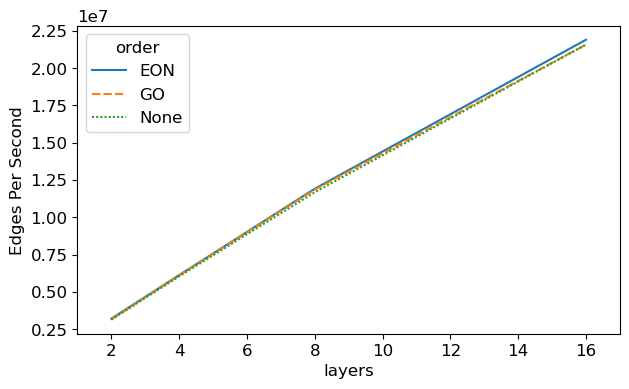

In [194]:
results_wide = df.pivot("layers", "order", "edges_per_second")
plt.figure(figsize=(7,4))
ax = sns.lineplot(data=results_wide)
ax.set_xlim(1,17)
ax.set_ylabel("Edges Per Second")
plt.savefig("eon_results.pdf")

In [206]:
df = pd.read_csv("../results/cache_results.csv", skiprows=lambda x : x%2==0, on_bad_lines="skip", index_col=False, names=["pid", 1, 2, 3, 4, 5, "misses", 6, "network", "layers", "order"])
df = df[["misses", "network", "layers", "order"]]
df["misses"] = df["misses"].astype(np.float32)
df.head()

/tmp/ipykernel_15613/948296433.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("../results/cache_results.csv", skiprows=lambda x : x%2==0, on_bad_lines="skip", index_col=False, names=["pid", 1, 2, 3, 4, 5, "misses", 6, "network", "layers", "order"])


,misses,network,layers,order
0,5.43,random-w16/0.05,2,EON
1,5.44,random-w16/0.05,2,GO
2,5.60,random-w16/0.05,2,None
3,5.55,random-w16/0.05,4,EON
4,5.66,random-w16/0.05,4,GO


/tmp/ipykernel_15613/714308976.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_wide = df.pivot("layers", "order", "misses")


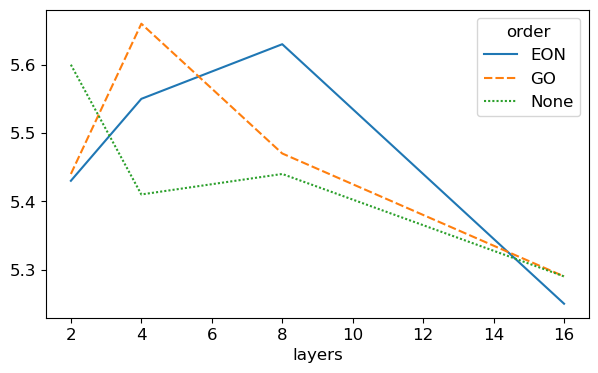

In [207]:
results_wide = df.pivot("layers", "order", "misses")
plt.figure(figsize=(7,4))
sns.lineplot(data=results_wide)
ax.set_xlim(1,17)
ax.set_ylabel("Percent Cache Misses")
plt.savefig("eon_cache_results.pdf")

In [208]:
df = pd.read_csv("../results/reorder_times.txt", names=["network", "layers", "order", "edges_per_second"])
df = df[df["order"] != "None"]
df = df.sort_values("layers")
df.head()

,network,layers,order,edges_per_second
0,dataset/networks/random-w16/0.05,2,EON,0.568883
1,dataset/networks/random-w16/0.05,2,GO,17615.542194
3,dataset/networks/random-w16/0.05,4,EON,0.965207
4,dataset/networks/random-w16/0.05,4,GO,5220.267794
6,dataset/networks/random-w16/0.05,8,EON,1.634769


In [209]:
df["latency"] = 1/df["edges_per_second"]
df.head()

,network,layers,order,edges_per_second,latency
0,dataset/networks/random-w16/0.05,2,EON,0.568883,1.757830
1,dataset/networks/random-w16/0.05,2,GO,17615.542194,0.000057
3,dataset/networks/random-w16/0.05,4,EON,0.965207,1.036047
4,dataset/networks/random-w16/0.05,4,GO,5220.267794,0.000192
6,dataset/networks/random-w16/0.05,8,EON,1.634769,0.611707


/tmp/ipykernel_15613/646567246.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_wide = df.pivot("layers", "order", "latency")


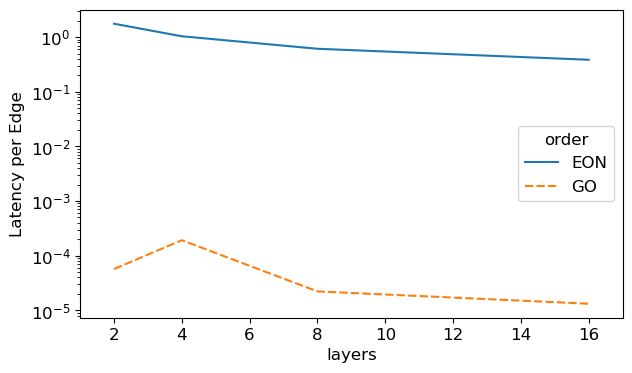

In [213]:
results_wide = df.pivot("layers", "order", "latency")
plt.figure(figsize=(7,4))
ax = sns.lineplot(data=results_wide)
ax.set_xlim(1,17)
ax.set_yscale("log")
ax.set_ylabel("Latency per Edge")
plt.savefig("eon_time_per_edge.pdf")